In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [17]:
def handGesture(img):
  # ret,img = cap.read()
  # img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
  img = cv2.resize(img, (514, 480))
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(5,5),0)
  ret,thresh1 = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  drawing = np.zeros(img.shape,np.uint8)

  max_area=0

  for i in range(len(contours)):
    cnt=contours[i]
    area = cv2.contourArea(cnt)
    if (area>max_area):
      max_area=area
      ci=i
  cnt=contours[ci]
  hull = cv2.convexHull(cnt)
  moments = cv2.moments(cnt)
  if moments['m00']!=0:
    cx = int(moments['m10']/moments['m00']) # cx = M10/M00
    cy = int(moments['m01']/moments['m00']) # cy = M01/M00

  centr=(cx,cy)
  cv2.circle(img,centr,5,[0,0,255],2)
  cv2.drawContours(drawing,[cnt],0,(0,255,0),2)
  cv2.drawContours(drawing,[hull],0,(0,0,255),2)

  cnt = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
  hull = cv2.convexHull(cnt,returnPoints = False)

  if (1):
    defects = cv2.convexityDefects(cnt,hull)
    mind=0
    maxd=0
    for i in range(defects.shape[0]):
      s,e,f,d = defects[i,0]
      start = tuple(cnt[s][0])
      end = tuple(cnt[e][0])
      far = tuple(cnt[f][0])
      dist = cv2.pointPolygonTest(cnt,centr,True)
      cv2.line(img,start,end,[0,0,255],5)

      cv2.circle(img,far,2,[0,0,255],-1)
      font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(img, "Number of Fingers: "+str(i), ( 26, 106), font, 0.5, (0, 0, 255), 2)
    i=0
    return (img)

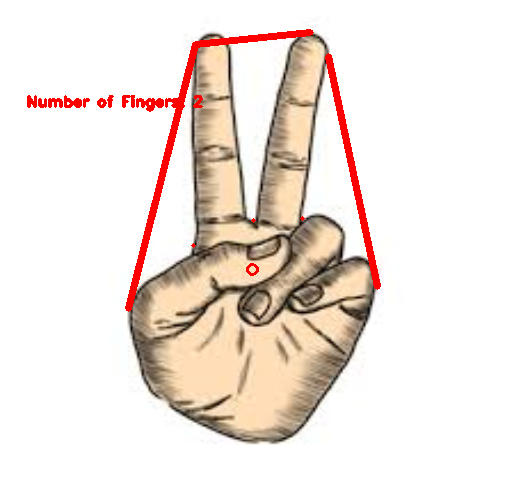

In [24]:
input = cv2.imread("test_images/image1.jpeg")
output = handGesture(input)
cv2_imshow(output)

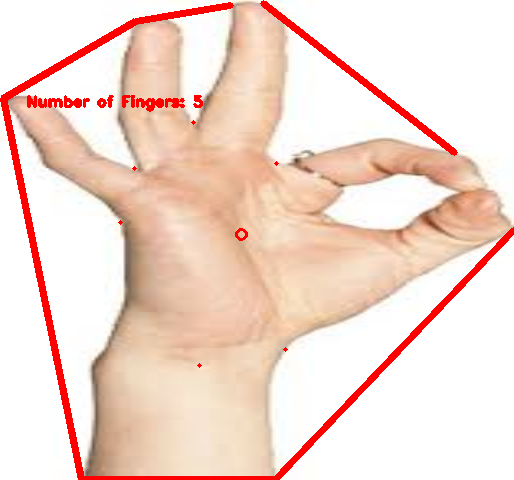

In [25]:
input = cv2.imread("test_images/image2.jpeg")
output = handGesture(input)
cv2_imshow(output)

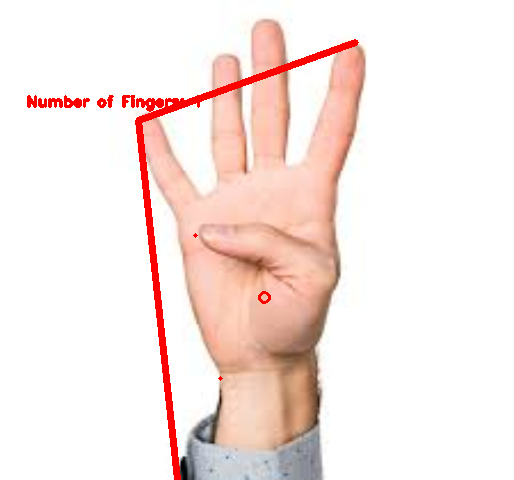

In [26]:
input = cv2.imread("test_images/image3.jpeg")
output = handGesture(input)
cv2_imshow(output)

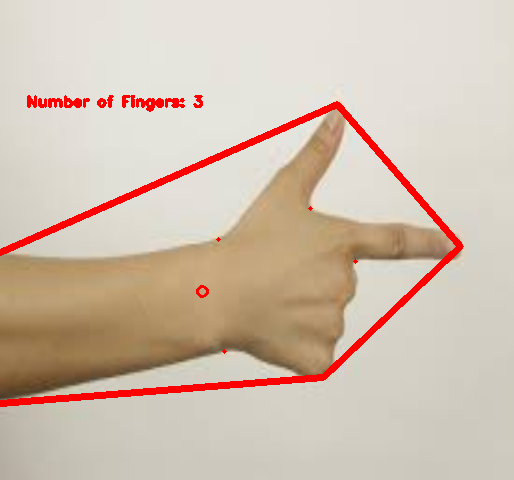

In [27]:
input = cv2.imread("test_images/image4.jpeg")
output = handGesture(input)
cv2_imshow(output)